# Spanish Wine Quality

1. Source: https://www.kaggle.com/datasets/fedesoriano/spanish-wine-quality-dataset

2. A list of 7000+ wines that describe their price, rating, and even some flavor description.

3. Rating

4. A product produced by a single winery, in a certain year.

5. Classification

6. 11

7. 7500

8. Wine and type may be hard to deal with.

Attribute Information
1. winery: Winery name
2. wine: Name of the wine
3. year: Year in which the grapes were harvested
4. rating: Average rating given to the wine by the users [from 1-5]
5. num_reviews: Number of users that reviewed the wine
6. country: Country of origin [Spain]
7. region: Region of the wine
8. price: Price in euros [€]
9. type: Wine variety
10. body: Body score, defined as the richness and weight of the wine in your of the wine in your mouth [from 1-5]
11. acidity: Acidity score, defined as wine's “pucker” or tartness; it's what makes a wine refreshing and your tongue salivate and want another sip [from 1-5]

In [1]:
#Imports
import os
os.environ["OMP_NUM_THREADS"] = '1'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import (roc_auc_score, ConfusionMatrixDisplay, 
                             PrecisionRecallDisplay, RocCurveDisplay, 
                             f1_score, accuracy_score, precision_score,
                             recall_score,mean_absolute_error,
                             mean_squared_error,explained_variance_score,max_error)
from sklearn.preprocessing import (StandardScaler,OrdinalEncoder,FunctionTransformer)
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer,ColumnTransformer,make_column_selector
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA


import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('C:/Users/Mikey/Documents/GitHub/dojo-env-setup/Project-2/imports/wines_SPA.csv')
df.head()

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58,Espana,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Espana,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Espana,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Espana,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Espana,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   winery       7500 non-null   object 
 1   wine         7500 non-null   object 
 2   year         7498 non-null   object 
 3   rating       7500 non-null   float64
 4   num_reviews  7500 non-null   int64  
 5   country      7500 non-null   object 
 6   region       7500 non-null   object 
 7   price        7500 non-null   float64
 8   type         6955 non-null   object 
 9   body         6331 non-null   float64
 10  acidity      6331 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 644.7+ KB


In [4]:
#Describe
df.describe()

,rating,num_reviews,price,body,acidity
count,7500.000000,7500.000000,7500.000000,6331.000000,6331.000000
mean,4.254933,451.109067,60.095822,4.158427,2.946612
std,0.118029,723.001856,150.356676,0.583352,0.248202
min,4.200000,25.000000,4.990000,2.000000,1.000000
25%,4.200000,389.000000,18.900000,4.000000,3.000000
50%,4.200000,404.000000,28.530000,4.000000,3.000000
75%,4.200000,415.000000,51.350000,5.000000,3.000000
max,4.900000,32624.000000,3119.080000,5.000000,3.000000


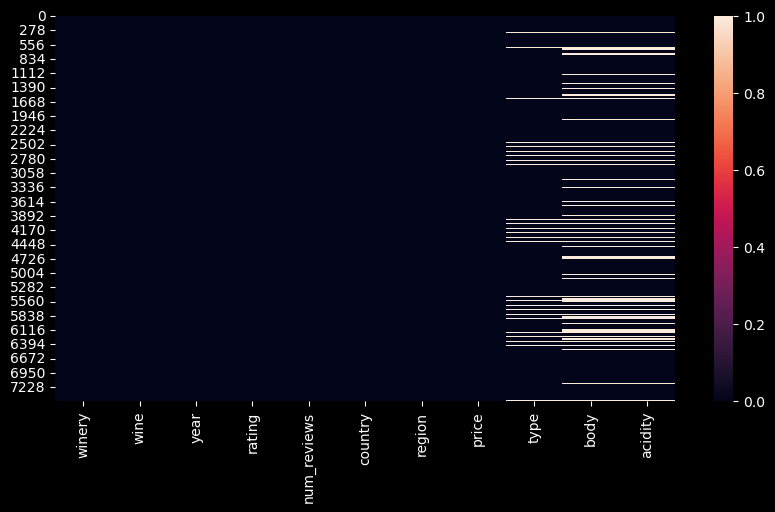

In [5]:
#Visual for missing values
plt.style.use('dark_background')
plt.figure(figsize=(10,5))
sns.heatmap(df.isna());

In [6]:
#Percentages of missing values.
percent_missing=df.isna().sum()*100/len(df)
print(percent_missing)

winery          0.000000
wine            0.000000
year            0.026667
rating          0.000000
num_reviews     0.000000
country         0.000000
region          0.000000
price           0.000000
type            7.266667
body           15.586667
acidity        15.586667
dtype: float64


In [7]:
#Creating a copy for exploratory data analysis and machine learning
ml_df=df.copy()
eda_df=df.copy()

#Data Cleaning

*   Some steps will only be performed on the eda_df copy as to prevent data leakage for the ml_df copy.





In [8]:
#Drop Duplicate rows
ml_df.drop_duplicates()
eda_df.drop_duplicates()

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58,Espana,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Espana,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Espana,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Espana,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Espana,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...
2046,Mustiguillo,Finca Terrerazo,2017,4.2,390,Espana,El Terrerazo,24.45,Red,4.0,3.0
2047,Matarromera,Gran Reserva,2011,4.2,389,Espana,Ribera del Duero,64.50,Ribera Del Duero Red,5.0,3.0
2048,Sei Solo,Preludio,2016,4.2,388,Espana,Ribera del Duero,31.63,Ribera Del Duero Red,5.0,3.0
2049,Vinedos de Paganos,El Puntido,2005,4.2,384,Espana,Rioja,73.00,Rioja Red,4.0,3.0


In [9]:
#NaN Values
eda_df.isna().sum()

winery            0
wine              0
year              2
rating            0
num_reviews       0
country           0
region            0
price             0
type            545
body           1169
acidity        1169
dtype: int64

In [10]:
#Country is all 1.
eda_df['country'].value_counts()
ml_df['country'].value_counts()

Espana    7500
Name: country, dtype: int64

In [11]:
#dropping as this info is not needed for our exploration of the data.
ml_df.drop(columns='country',inplace=True)
eda_df.drop(columns='country',inplace=True)

In [12]:
#Year has missing values and is listed as an object. Setting max rows to find errors.
pd.set_option('display.max_rows',None)
eda_df['year'].value_counts()

2011    1190
2016     897
2015     860
2018     850
2017     731
2012     528
2020     474
2014     376
2019     331
N.V.     288
2004     254
2005     198
2010      74
2013      66
2009      46
2007      38
2006      32
2008      30
2001      21
2000      18
1994      13
1995      13
2003      13
1998      12
2002      12
1996      11
1999      10
1982       8
1964       7
1989       7
1985       7
2021       6
1987       6
1986       6
1968       5
1970       5
1981       4
1997       3
1991       3
1973       3
1955       2
1965       2
1959       2
1980       2
1983       2
1988       2
1975       2
1962       2
1990       2
1979       2
1946       2
1951       1
1928       1
1929       1
1976       1
1949       1
1922       1
1978       1
1969       1
1942       1
1954       1
1961       1
1910       1
1967       1
1992       1
1958       1
1953       1
1972       1
1974       1
1931       1
1925       1
Name: year, dtype: int64

In [13]:
#Replacing N.V. with NaN, dropping them, converting year to int
eda_df['year']=eda_df['year'].replace('N.V.',np.nan)
eda_df=eda_df.dropna(subset=['year'])
eda_df['year']=eda_df['year'].astype('int64')

#ML copy
ml_df['year']=ml_df['year'].replace('N.V.',np.nan)
ml_df=ml_df.dropna(subset=['year'])
ml_df['year']=ml_df['year'].astype('int64')

In [14]:
eda_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7210 entries, 0 to 7499
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   winery       7210 non-null   object 
 1   wine         7210 non-null   object 
 2   year         7210 non-null   int64  
 3   rating       7210 non-null   float64
 4   num_reviews  7210 non-null   int64  
 5   region       7210 non-null   object 
 6   price        7210 non-null   float64
 7   type         6672 non-null   object 
 8   body         6070 non-null   float64
 9   acidity      6070 non-null   float64
dtypes: float64(4), int64(2), object(4)
memory usage: 619.6+ KB


In [15]:
eda_df.isna().sum()

winery            0
wine              0
year              0
rating            0
num_reviews       0
region            0
price             0
type            538
body           1140
acidity        1140
dtype: int64

In [16]:
#Filling NaN values for body, acidity, and type. Using median for this just for data exploration
eda_df['body']=eda_df['body'].fillna(eda_df.groupby('rating')['body'].transform('median'))
eda_df['acidity']=eda_df['acidity'].fillna(eda_df.groupby('rating')['acidity'].transform('median'))
eda_df['type']=eda_df['type'].fillna(df['type'].mode())

In [17]:
ml_df['type'] = np.where(ml_df['type'].str.contains('red',case=False),'Red',ml_df['type'])
eda_df['type'] = np.where(eda_df['type'].str.contains('red',case=False),'Red',eda_df['type'])

In [18]:
#Create a list for Categorical data
cat_col=eda_df.select_dtypes(['object']).columns

In [19]:
cat_col

Index(['winery', 'wine', 'region', 'type'], dtype='object')

In [20]:
#Using a loop to find bad categorical data.
totalrows=len(eda_df)
for column in cat_col:
    value_counts=eda_df[column].value_counts()
    percent=value_counts/totalrows
    badcats=percent[percent < 0.03].index
    print(badcats)

Index(['Vinedos de Paganos', 'Vega Sicilia', 'Remirez de Ganuza',
       'Alvaro Palacios', 'Marques de Murrieta', 'Dominio de Pingus',
       'Martinet', 'Abadia Retuerta', 'Emilio Moro', 'Vina Sastre',
       ...
       'Vins Miquel Gelabert', 'El Grillo y La Luna', 'Altos del Terral',
       'Jean Leon', 'Bodegas Ateca', 'Uvaguilera Aguilera',
       'Fernandez de Pierola', 'De Muller', 'Monteabellon',
       'Martinez Lacuesta'],
      dtype='object', length=423)
Index(['El Puntido', 'Rioja Blanco', 'Tinto', 'Unico', 'Valbuena 5o',
       'Priorat', 'Ribera del Duero', 'Unico Reserva Especial Edicion',
       'Rioja Gran Reserva', 'L'Ermita Velles Vinyes Priorat',
       ...
       'Seleccion La Aguilera', 'Don PX Vieja Cosecha',
       'Alenza Ribera del Duero Gran Reserva', 'Ribas de Cabrera', 'Cenit',
       'La Baraja', 'Magico', 'Mas del Serral',
       'Vina Tondonia Gran Reserva Blanco', 'Valdafoz Bierzo (Corullon)'],
      dtype='object', length=756)
Index(['Castilla y Leon

In [21]:
#Using lambda to remove anything that appears less than 3% of the time.
mask=eda_df[cat_col].apply(lambda x: x.map(x.value_counts(normalize=True)) >= 0.03).all(axis=1)
eda_df=eda_df[mask]

In [22]:
#Checking this worked.
for column in cat_col:
    value_counts=eda_df[column].value_counts()
    print(value_counts)

Contino                 444
Imperial                225
Matsu                   224
Artadi                  223
La Vicalanda            223
Vina Pedrosa            223
Bodegas La Horra        223
Ramon Bilbao            223
Sei Solo                222
Losada                  222
Portal del Priorat      222
Sierra Cantabria        221
Mustiguillo             221
La Rioja Alta           221
Matarromera             221
Enrique Mendoza         220
Clos Pons               220
Mar de Frades           220
Campillo                220
Ramon do Casar          220
Binigrau                220
Conreria d'Scala Dei    220
Name: winery, dtype: int64
Gran Reserva                          445
Reserva                               443
Rioja Reserva                         225
El Viejo                              224
Valdegines                            223
Rioja Graciano                        223
Mirto                                 223
Corimbo I                             223
Preludio             

#Exploritory data analysis visualizations

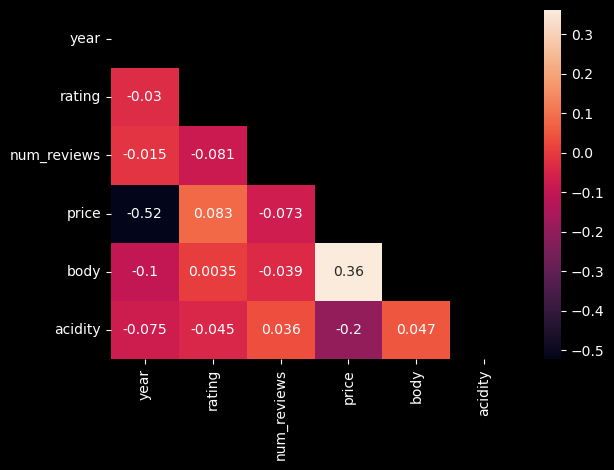

In [23]:
#Heatmap
corr=eda_df.corr()
plt.style.use('dark_background')
mask=np.triu(np.ones_like(corr))
sns.heatmap(corr,annot=True,mask=mask)
plt.tight_layout();

# Insights from heatmap we can see a few different things.
## Positive Correlations
* Price and Body show a correlation coefficient of 0.36.

## Negative Correlations
* Year and Price show a negative correlation coefficient of -0.47.

### From these insights, we can conclude that price is directly affected by the wine's body.
### We can also observe that Year and Price do not drastically affect the price.


# Exploratory Data Analysis

### Box Plots for continuous data

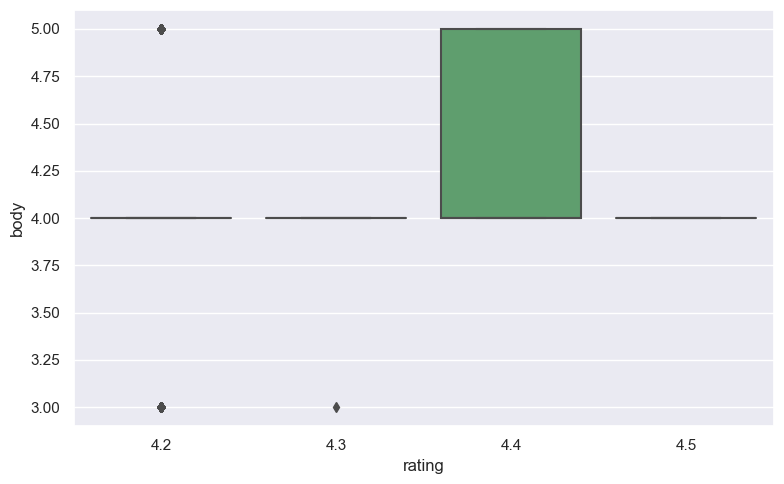

In [24]:

sns.set(style='darkgrid')
plt.figure(figsize=(8,5))
ax=sns.boxplot(data=eda_df,x='rating',y='body')
plt.tight_layout();

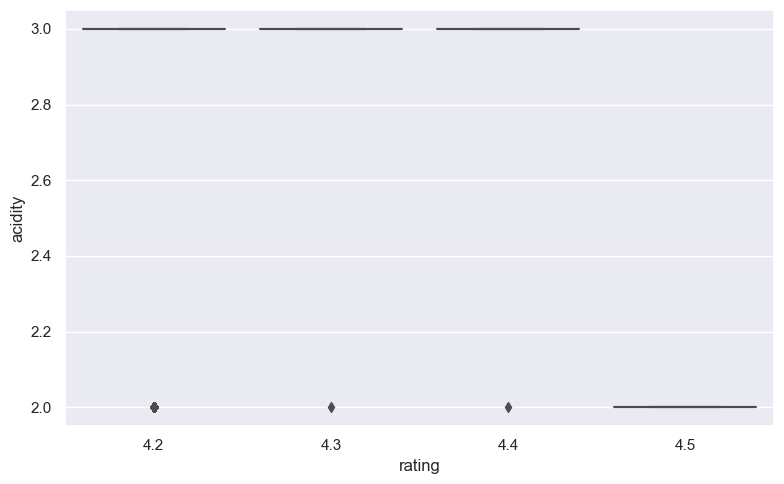

In [25]:
sns.set(style='darkgrid')
plt.figure(figsize=(8,5))
ax=sns.boxplot(data=eda_df,x='rating',y='acidity')
plt.tight_layout();

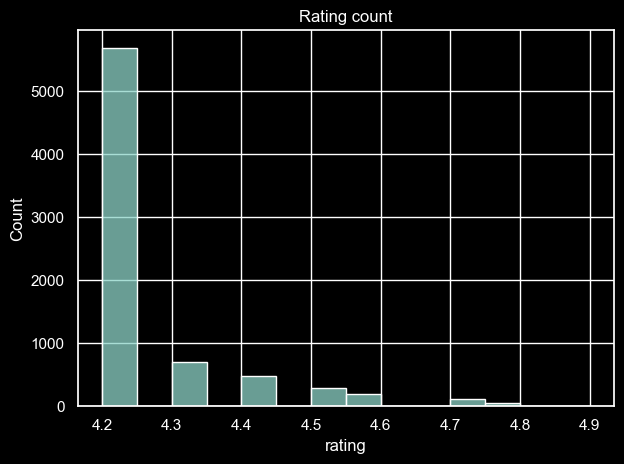

In [26]:
sns.set(style='darkgrid')
plt.style.use('dark_background')
ax=sns.histplot(df['rating'])
ax.set_title('Rating count')
plt.tight_layout();

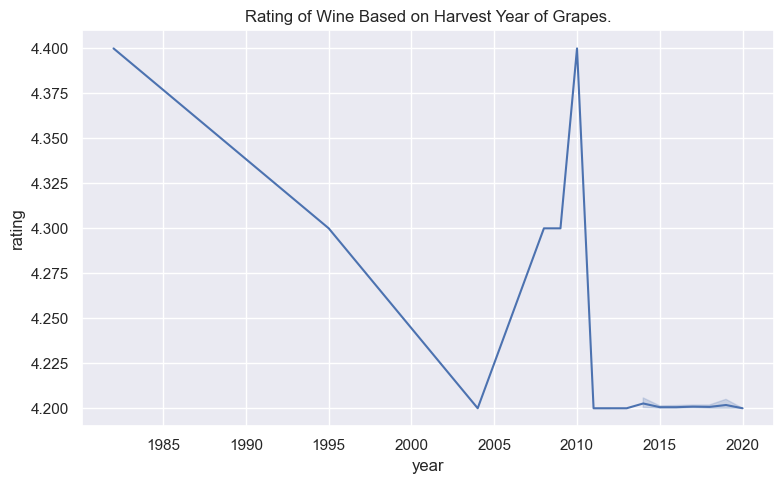

In [27]:
sns.set(style='darkgrid')
plt.figure(figsize=(8,5))
ax=sns.lineplot(data=eda_df,x='year',y='rating')
ax.set_title('Rating of Wine Based on Harvest Year of Grapes.')
plt.tight_layout();

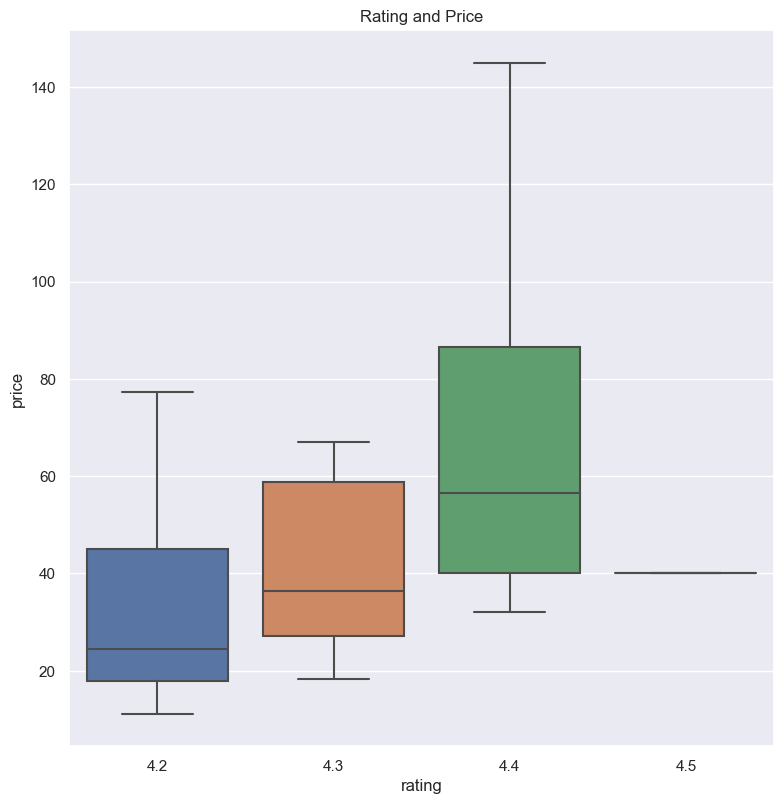

In [28]:
plt.figure(figsize=(8,8))
sns.set(style='darkgrid')
ax=sns.boxplot(data=eda_df,x='rating',y='price',orient="v")
plt.tight_layout()
ax.set_title('Rating and Price');

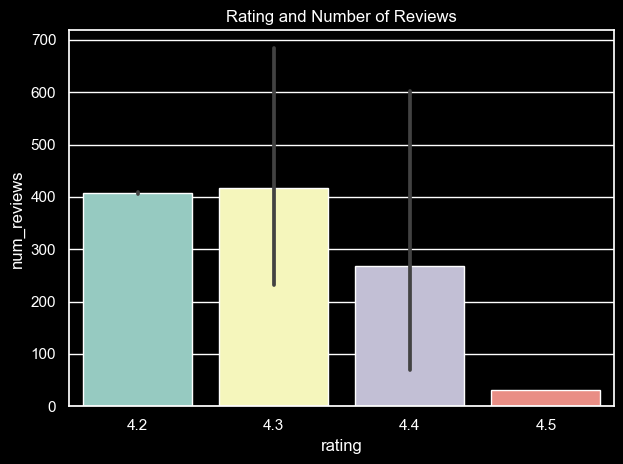

In [29]:
sns.set(style='darkgrid')
plt.style.use('dark_background')
ax=sns.barplot(data=eda_df,x='rating',y='num_reviews')
ax.set_title('Rating and Number of Reviews')
plt.tight_layout();

#Outliers May Include

*   Acidity
*   Body
*   Number of Reviews
*   Price



# Key Trends

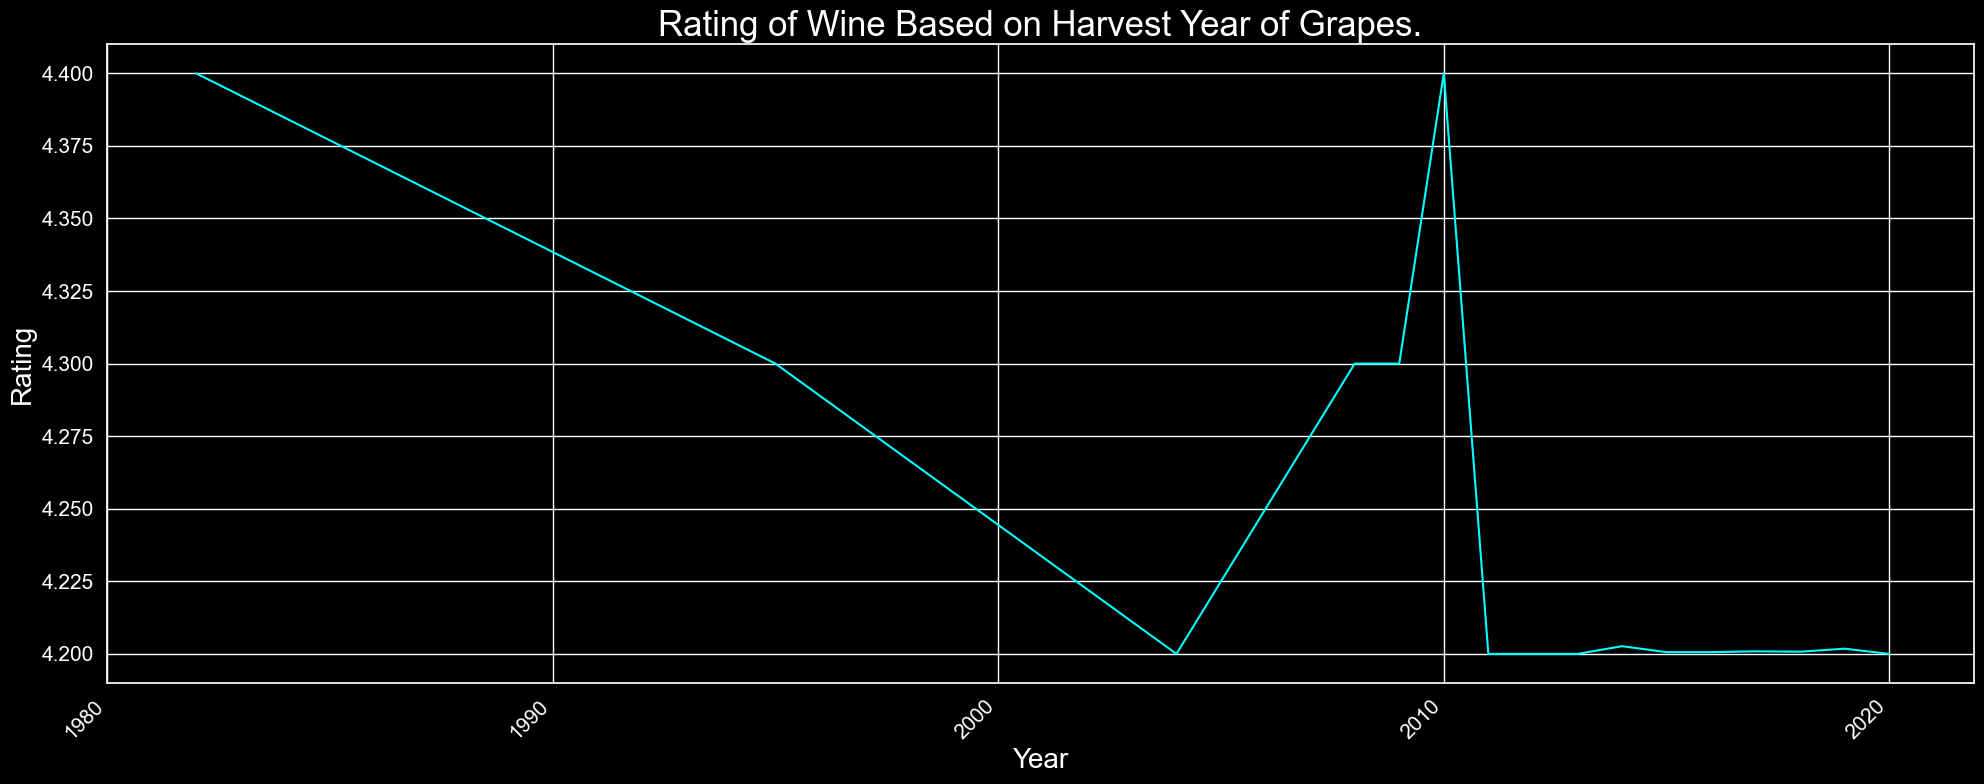

In [30]:
plt.figure(figsize=(20,8))
sns.set_style('darkgrid')
plt.style.use('dark_background')
ax=sns.lineplot(data=eda_df,y='rating',x='year',ci=None,color='cyan')
ax.set_title('Rating of Wine Based on Harvest Year of Grapes.',fontsize=25)
ax.set_xlabel('Year',fontsize=20)
ax.set_ylabel('Rating',fontsize=20)
ax.set_xticks((1980,1990,2000,2010,2020))
ax.set_xticklabels(ax.get_xticklabels(),rotation=45, horizontalalignment='right',fontsize=15)
ax.set_yticklabels(ax.get_yticklabels(),fontsize=15)
plt.tight_layout();

### Above line plot shows the drop in rating based on the year grapes were harvested. A significant decline can be seen from 1980 onward. Until 2010, we can see a large uptick in rating, and then a steep fall-off. Probably a good harvest year!

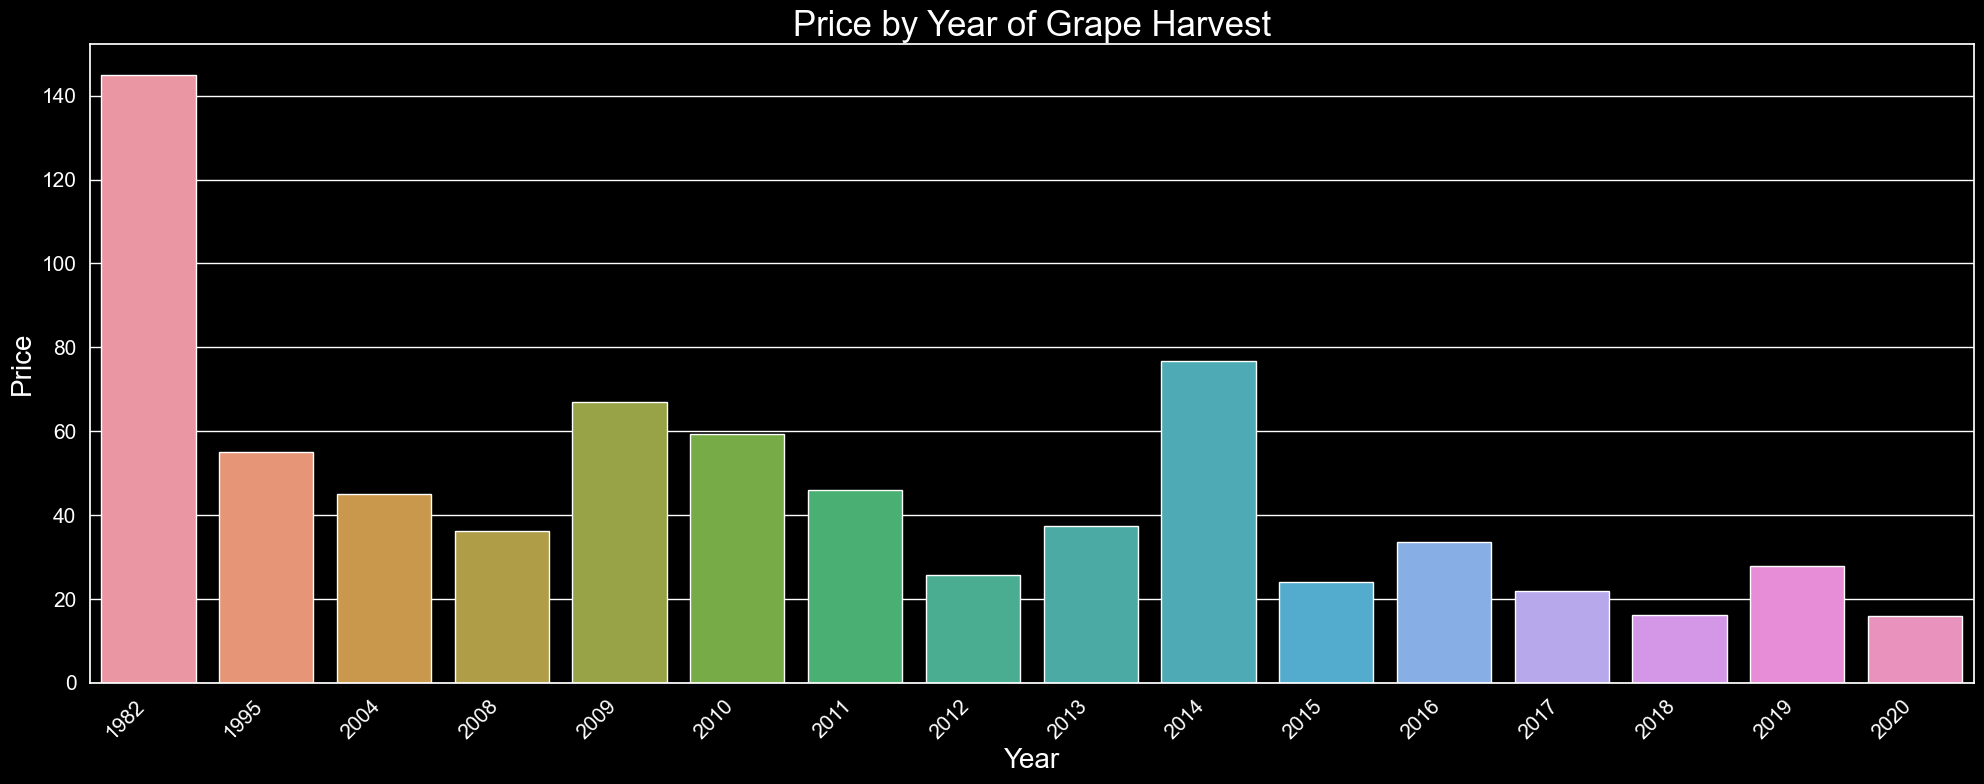

In [31]:
plt.figure(figsize=(20,8))
plt.style.use('dark_background')
ax=sns.barplot(data=eda_df,x='year',y='price',ci=None)
ax.set_title('Price by Year of Grape Harvest',fontsize=25)
ax.set_xlabel('Year',fontsize=20)
ax.set_ylabel('Price',fontsize=20)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45, horizontalalignment='right',fontsize=15)
ax.set_yticklabels(ax.get_yticklabels(),fontsize=15)
plt.tight_layout();

### The above bar plot shows that after the year 2004, almost no wine produced sold for over '80'. This bit of information seems useful as it may be a grape quality issue, as discussed in our other trend of rating by year of the grape harvest.

# Modeling

In [32]:
## Create a function to display the classification metrics of a model
def regression_metrics(model,X_test,y_test,label='Test Data',normalize='true',thresh=.5):                              
    ## Get the predictions
    y_pred = model.predict(X_test)
    y_pred_class = [1 if x > thresh else 0 for x in y_pred]
    print('---' * 20)
    print(f"[i] REGRESSION METRICS FOR: {label}")
    print('---' * 20)
    print(f"R2 Score: {model.score(X_test, y_test):.4f}")
    print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred):.6f}")
    print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.6f}")
    print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, y_pred)):.6f}")
    print(f"Explained Variance Score: {explained_variance_score(y_test, y_pred):.6f}")
    print(f"Max Error: {max_error(y_test, y_pred):.6f}")
    plt.show()

In [33]:
#Reusing previous code to fix bad categorical data in machine learning data set.
mask=ml_df[cat_col].apply(lambda x: x.map(x.value_counts(normalize=True)) >= 0.03).all(axis=1)
ml_df=ml_df[mask]

In [34]:
# Define Target and Train, Test Split
target=ml_df['rating']
X=ml_df.drop(columns=['rating']).copy()
y=target.copy()
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=42)

In [35]:
#Numeric
mean_imputer=SimpleImputer(missing_values=np.nan,strategy='mean')
scaler = StandardScaler()
num_pipeline=make_pipeline(mean_imputer,scaler)
num_selector=make_column_selector(dtype_include='number')
numeric_tuple=(num_pipeline, num_selector)

In [36]:
ml_df.describe(include='object')

,winery,wine,region,type
count,5098,5098,5098,5098
unique,22,21,12,4
top,Contino,Gran Reserva,Rioja,Red
freq,444,445,1777,4433


In [37]:
#Ordered Category Lists
# Populate list with unique categories.
wine_list=ml_df['wine'].unique().tolist()
winery_list=ml_df['winery'].unique().tolist()
region_list=ml_df['region'].unique().tolist()
type_list=ml_df['type'].unique().tolist()
categories=[wine_list, winery_list, region_list, type_list]
#Transformers
orde=OrdinalEncoder(categories=categories,handle_unknown='use_encoded_value',unknown_value=-1)
#We will use a most frequent imputer to impute missing values for the ordinal columns
freq_imputer=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
#We have more than 2 ordinal values for each column so using scaler
scaler2=StandardScaler()
#Pipeline
ord_pipeline=make_pipeline(freq_imputer,orde,scaler2)
#Selector
ordinal_cols=['winery','wine','region','type']
# Tuple
ordinal_tuple=(ord_pipeline,ordinal_cols)

In [38]:
#Preprocessor
preprocessor=make_column_transformer(ordinal_tuple,numeric_tuple,remainder='drop')
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Valdegines',
                                                                              'El '
                                                                              'Viejo',
                                                                              'Gran '
                                                                              'Reserva',
                                                                              'Clos '
                                                                              'del '
                                                                              'Portal '
                                                                              'Somni',
                                                                              'Rioja '
                                                                              'Reserva',
                                                                              'Reserva',
                                                                              'Mirto',
                                                                              'Finca '
                                                                              'Terrerazo',
                                                                              'Coleccion '
                                                                              'Privada',
                                                                              'Rioja '
                                                                              'Graciano',
                                                                              'Altos '
                                                                              'de '
                                                                              'Losada',
                                                                              'Vi...
                                                                             ['Tempranillo',
                                                                              'Red',
                                                                              'Mencia',
                                                                              'Albarino']],
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=-1)),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['winery', 'wine', 'region', 'type']),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x000001D2C6F2C4C0>)])

# K-Nearest Neighbor Regressor

In [39]:
knn=KNeighborsRegressor()
#Create a pipeline
knn_pipe=make_pipeline(preprocessor,knn)
#Fit
knn_pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinalencoder',
                                                                   OrdinalEncoder(categories=[['Valdegines',
                                                                                               'El '
                                                                                               'Viejo',
                                                                                               'Gran '
                                                                                               'Reserva',
                                                                                               'Clos '
                                                                                               'del '
                                                                                               'Portal '
                                                                                               'Somni',
                                                                                               'Rioja '
                                                                                               'Reserva',
                                                                                               'Reserva',
                                                                                               'Mirto',
                                                                                               'Finca '
                                                                                               'Terrerazo',
                                                                                               'Coleccion '
                                                                                               'Privada',
                                                                                               'Rio...
                                                                                  handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['winery', 'wine', 'region',
                                                   'type']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001D2C6F2C4C0>)])),
                ('kneighborsregressor', KNeighborsRegressor())])

In [40]:
#Predict
knnpred_train=knn_pipe.predict(X_train)
knnpred_test=knn_pipe.predict(X_test)

In [41]:
#Regression Metrics
regression_metrics(knn_pipe, X_test, y_test, label='Test Data')
regression_metrics(knn_pipe, X_train, y_train, label='Training Data')

------------------------------------------------------------
[i] REGRESSION METRICS FOR: Test Data
------------------------------------------------------------
R2 Score: 0.6384
Mean Absolute Error: 0.000392
Mean Squared Error: 0.000028
Root Mean Squared Error: 0.005314
Explained Variance Score: 0.638405
Max Error: 0.100000
------------------------------------------------------------
[i] REGRESSION METRICS FOR: Training Data
------------------------------------------------------------
R2 Score: 0.7030
Mean Absolute Error: 0.000407
Mean Squared Error: 0.000035
Root Mean Squared Error: 0.005901
Explained Variance Score: 0.703200
Max Error: 0.180000


In [42]:
#Get Params
pd.set_option('display.max_rows',10)
knn_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('pipeline-1',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(strategy='most_frequent')),
                                                    ('ordinalencoder',
                                                     OrdinalEncoder(categories=[['Valdegines',
                                                                                 'El '
                                                                                 'Viejo',
                                                                                 'Gran '
                                                                                 'Reserva',
                                                                                 'Clos '
                                                                                 'del '
                                  

In [43]:
params={'kneighborsregressor__n_neighbors':[3,5,7,10,15,20],
         'kneighborsregressor__weights':['uniform','distance'],}

In [44]:
#Create pipeline to find best parameters
gridsearcherknn=GridSearchCV(knn_pipe,params)
gridsearcherknn

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('ordinalencoder',
                                                                                          OrdinalEncoder(categories=[['Valdegines',
                                                                                                                      'El '
                                                                                                                      'Viejo',
                                                                                                                      'Gran '
                                                                                                                      'Reserva',
                                                                                                                      'Clos '
                                                                                                                      'del '
                                                                                                                      'Portal '
                                                                                                                      'Somni',
                                                                                                                      'Rioja '
                                                                                                                      'Reserva',
                                                                                                                      'Reserva',
                                                                                                                      'Mirto',
                                                                                                                      'Finca '
                                                                                                                      'Terrerazo',
                                                                                                                      'C...
                                                                        ('pipeline-2',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer()),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x000001D2C6F2C4C0>)])),
                                       ('kneighborsregressor',
                                        KNeighborsRegressor())]),
             param_grid={'kneighborsregressor__n_neighbors': [3, 5, 7, 10, 15,
                                                              20],
                         'kneighborsregressor__weights': ['uniform',
                                                          'distance']})

In [45]:
#Fit it
gridsearcherknn.fit(X_train,y_train)

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('ordinalencoder',
                                                                                          OrdinalEncoder(categories=[['Valdegines',
                                                                                                                      'El '
                                                                                                                      'Viejo',
                                                                                                                      'Gran '
                                                                                                                      'Reserva',
                                                                                                                      'Clos '
                                                                                                                      'del '
                                                                                                                      'Portal '
                                                                                                                      'Somni',
                                                                                                                      'Rioja '
                                                                                                                      'Reserva',
                                                                                                                      'Reserva',
                                                                                                                      'Mirto',
                                                                                                                      'Finca '
                                                                                                                      'Terrerazo',
                                                                                                                      'C...
                                                                        ('pipeline-2',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer()),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x000001D2C6F2C4C0>)])),
                                       ('kneighborsregressor',
                                        KNeighborsRegressor())]),
             param_grid={'kneighborsregressor__n_neighbors': [3, 5, 7, 10, 15,
                                                              20],
                         'kneighborsregressor__weights': ['uniform',
                                                          'distance']})

In [46]:
#Print best parameters and save them.
print(gridsearcherknn.best_params_)
gridbest_paramsknn=gridsearcherknn.best_estimator_

{'kneighborsregressor__n_neighbors': 5, 'kneighborsregressor__weights': 'uniform'}


In [47]:
#Fit
gridbest_paramsknn.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinalencoder',
                                                                   OrdinalEncoder(categories=[['Valdegines',
                                                                                               'El '
                                                                                               'Viejo',
                                                                                               'Gran '
                                                                                               'Reserva',
                                                                                               'Clos '
                                                                                               'del '
                                                                                               'Portal '
                                                                                               'Somni',
                                                                                               'Rioja '
                                                                                               'Reserva',
                                                                                               'Reserva',
                                                                                               'Mirto',
                                                                                               'Finca '
                                                                                               'Terrerazo',
                                                                                               'Coleccion '
                                                                                               'Privada',
                                                                                               'Rio...
                                                                                  handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['winery', 'wine', 'region',
                                                   'type']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001D2C5E55250>)])),
                ('kneighborsregressor', KNeighborsRegressor())])

In [48]:
%%time
#Predict on best parameters
bestknn=gridbest_paramsknn.predict(X_test)
bestknn_train=gridbest_paramsknn.predict(X_train)

CPU times: total: 0 ns
Wall time: 25.5 ms


In [49]:
#Best Parameters Classification reports
regression_metrics(gridbest_paramsknn,X_test,y_test,label='Test Data')
regression_metrics(gridbest_paramsknn,X_train,y_train,label='Training Data')

------------------------------------------------------------
[i] REGRESSION METRICS FOR: Test Data
------------------------------------------------------------
R2 Score: 0.6384
Mean Absolute Error: 0.000392
Mean Squared Error: 0.000028
Root Mean Squared Error: 0.005314
Explained Variance Score: 0.638405
Max Error: 0.100000
------------------------------------------------------------
[i] REGRESSION METRICS FOR: Training Data
------------------------------------------------------------
R2 Score: 0.7030
Mean Absolute Error: 0.000407
Mean Squared Error: 0.000035
Root Mean Squared Error: 0.005901
Explained Variance Score: 0.703200
Max Error: 0.180000


# Decision Tree Regressor

In [50]:
dt=DecisionTreeRegressor()
dt_pipe=make_pipeline(preprocessor,dt)
dt_pipe.fit(X_train,y_train)
y_pred=dt_pipe.predict(X_test)

In [51]:
regression_metrics(dt_pipe,X_test,y_test,label='Test Data')
regression_metrics(dt_pipe,X_train,y_train,label='Training Data')

------------------------------------------------------------
[i] REGRESSION METRICS FOR: Test Data
------------------------------------------------------------
R2 Score: 0.6233
Mean Absolute Error: 0.000294
Mean Squared Error: 0.000029
Root Mean Squared Error: 0.005423
Explained Variance Score: 0.623461
Max Error: 0.100000
------------------------------------------------------------
[i] REGRESSION METRICS FOR: Training Data
------------------------------------------------------------
R2 Score: 1.0000
Mean Absolute Error: 0.000000
Mean Squared Error: 0.000000
Root Mean Squared Error: 0.000000
Explained Variance Score: 1.000000
Max Error: 0.000000


In [52]:
#Get Params
pd.set_option('display.max_rows',10)
dt_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('pipeline-1',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(strategy='most_frequent')),
                                                    ('ordinalencoder',
                                                     OrdinalEncoder(categories=[['Valdegines',
                                                                                 'El '
                                                                                 'Viejo',
                                                                                 'Gran '
                                                                                 'Reserva',
                                                                                 'Clos '
                                                                                 'del '
                                  

In [53]:
params = {'decisiontreeregressor__max_depth':[None,3,5,7],
          'decisiontreeregressor__min_samples_split':[2,5,10],
          'decisiontreeregressor__min_samples_leaf':[1,2,4],
          'decisiontreeregressor__max_features':['auto','sqrt','log2'],
          'decisiontreeregressor__criterion':['mse','mae']}

In [54]:
gridsearcherdt=GridSearchCV(dt_pipe,params)
gridsearcherdt

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('ordinalencoder',
                                                                                          OrdinalEncoder(categories=[['Valdegines',
                                                                                                                      'El '
                                                                                                                      'Viejo',
                                                                                                                      'Gran '
                                                                                                                      'Reserva',
                                                                                                                      'Clos '
                                                                                                                      'del '
                                                                                                                      'Portal '
                                                                                                                      'Somni',
                                                                                                                      'Rioja '
                                                                                                                      'Reserva',
                                                                                                                      'Reserva',
                                                                                                                      'Mirto',
                                                                                                                      'Finca '
                                                                                                                      'Terrerazo',
                                                                                                                      'C...
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x000001D2C6F2C4C0>)])),
                                       ('decisiontreeregressor',
                                        DecisionTreeRegressor())]),
             param_grid={'decisiontreeregressor__criterion': ['mse', 'mae'],
                         'decisiontreeregressor__max_depth': [None, 3, 5, 7],
                         'decisiontreeregressor__max_features': ['auto', 'sqrt',
                                                                 'log2'],
                         'decisiontreeregressor__min_samples_leaf': [1, 2, 4],
                         'decisiontreeregressor__min_samples_split': [2, 5,
                                                                      10]})

In [55]:
%%time
#Fit it
gridsearcherdt.fit(X_train,y_train)

CPU times: total: 29.3 s
Wall time: 52.7 s


GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('ordinalencoder',
                                                                                          OrdinalEncoder(categories=[['Valdegines',
                                                                                                                      'El '
                                                                                                                      'Viejo',
                                                                                                                      'Gran '
                                                                                                                      'Reserva',
                                                                                                                      'Clos '
                                                                                                                      'del '
                                                                                                                      'Portal '
                                                                                                                      'Somni',
                                                                                                                      'Rioja '
                                                                                                                      'Reserva',
                                                                                                                      'Reserva',
                                                                                                                      'Mirto',
                                                                                                                      'Finca '
                                                                                                                      'Terrerazo',
                                                                                                                      'C...
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x000001D2C6F2C4C0>)])),
                                       ('decisiontreeregressor',
                                        DecisionTreeRegressor())]),
             param_grid={'decisiontreeregressor__criterion': ['mse', 'mae'],
                         'decisiontreeregressor__max_depth': [None, 3, 5, 7],
                         'decisiontreeregressor__max_features': ['auto', 'sqrt',
                                                                 'log2'],
                         'decisiontreeregressor__min_samples_leaf': [1, 2, 4],
                         'decisiontreeregressor__min_samples_split': [2, 5,
                                                                      10]})

In [56]:
#Print best parameters and save them.
print(gridsearcherdt.best_params_)
gridbest_paramsdt=gridsearcherknn.best_estimator_

{'decisiontreeregressor__criterion': 'mae', 'decisiontreeregressor__max_depth': None, 'decisiontreeregressor__max_features': 'sqrt', 'decisiontreeregressor__min_samples_leaf': 1, 'decisiontreeregressor__min_samples_split': 2}


In [57]:
#Fit
gridbest_paramsdt.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinalencoder',
                                                                   OrdinalEncoder(categories=[['Valdegines',
                                                                                               'El '
                                                                                               'Viejo',
                                                                                               'Gran '
                                                                                               'Reserva',
                                                                                               'Clos '
                                                                                               'del '
                                                                                               'Portal '
                                                                                               'Somni',
                                                                                               'Rioja '
                                                                                               'Reserva',
                                                                                               'Reserva',
                                                                                               'Mirto',
                                                                                               'Finca '
                                                                                               'Terrerazo',
                                                                                               'Coleccion '
                                                                                               'Privada',
                                                                                               'Rio...
                                                                                  handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['winery', 'wine', 'region',
                                                   'type']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001D2C5E55250>)])),
                ('kneighborsregressor', KNeighborsRegressor())])

In [58]:
%%time
#Predict on best parameters
bestdt=gridbest_paramsdt.predict(X_test)
bestdt_train=gridbest_paramsdt.predict(X_train)

CPU times: total: 31.2 ms
Wall time: 46.1 ms


In [59]:
#Best Parameters Classification reports
regression_metrics(gridbest_paramsdt,X_test,y_test,label='Test Data')
regression_metrics(gridbest_paramsdt,X_train,y_train,label='Training Data')

------------------------------------------------------------
[i] REGRESSION METRICS FOR: Test Data
------------------------------------------------------------
R2 Score: 0.6384
Mean Absolute Error: 0.000392
Mean Squared Error: 0.000028
Root Mean Squared Error: 0.005314
Explained Variance Score: 0.638405
Max Error: 0.100000
------------------------------------------------------------
[i] REGRESSION METRICS FOR: Training Data
------------------------------------------------------------
R2 Score: 0.7030
Mean Absolute Error: 0.000407
Mean Squared Error: 0.000035
Root Mean Squared Error: 0.005901
Explained Variance Score: 0.703200
Max Error: 0.180000
